In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds

(ds_train, ds_test), info = tfds.load(
    'cats_vs_dogs',
    split=['train[:80%]', 'train[80%:]'],
    with_info=True,
    as_supervised=True
)

print("Dataset Loaded ✅")


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/incomplete.F19V3D_4.0.1/cats_vs_dogs-train.tfrecord*...:   0%…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.1. Subsequent calls will reuse this data.
Dataset Loaded ✅


In [ ]:
IMG_SIZE = 224

def format_image(image, label):
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    image = image / 255.0
    return image, label

train = ds_train.map(format_image).batch(32)
test = ds_test.map(format_image).batch(32)


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, 3, activation='relu', input_shape=(224,224,3)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [ ]:
history = model.fit(train, epochs=5, validation_data=test)


Epoch 1/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 1663s 3s/step - accuracy: 0.6064 - loss: 0.9241 - val_accuracy: 0.6907 - val_loss: 0.6006
Epoch 2/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 1664s 3s/step - accuracy: 0.7230 - loss: 0.5398 - val_accuracy: 0.6999 - val_loss: 0.6016
Epoch 3/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 1716s 3s/step - accuracy: 0.8189 - loss: 0.3894 - val_accuracy: 0.6896 - val_loss: 0.7247
Epoch 4/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 1670s 3s/step - accuracy: 0.9088 - loss: 0.2249 - val_accuracy: 0.6922 - val_loss: 1.0271
Epoch 5/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 1688s 3s/step - accuracy: 0.9560 - loss: 0.1249 - val_accuracy: 0.6868 - val_loss: 1.3272


In [ ]:
import matplotlib.pyplot as plt


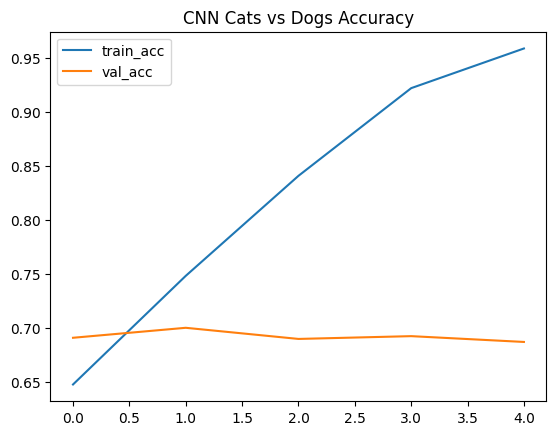

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.title('CNN Cats vs Dogs Accuracy')
plt.legend()
plt.show()


In [ ]:
(ds_train, ds_test), info = tfds.load(
'tf_flowers',
split=['train[:80%]', 'train[80%:]'],
with_info=True,
as_supervised=True
)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/tf_flowers/incomplete.QXQCOE_3.0.1/tf_flowers-train.tfrecord*...:   0%|   …

Dataset tf_flowers downloaded and prepared to /root/tensorflow_datasets/tf_flowers/3.0.1. Subsequent calls will reuse this data.


In [ ]:
IMG_SIZE = 224

def preprocess(image, label):
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    image = image / 255.0
    return image, label

train = ds_train.map(preprocess).batch(32)
test = ds_test.map(preprocess).batch(32)


In [ ]:
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(224,224,3),
    include_top=False,
    weights='imagenet'
)

base_model.trainable = False


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(5, activation='softmax')
])


In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(train, epochs=5, validation_data=test)


Epoch 1/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 174s 2s/step - accuracy: 0.5584 - loss: 1.0937 - val_accuracy: 0.8501 - val_loss: 0.4647
Epoch 2/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 140s 2s/step - accuracy: 0.8560 - loss: 0.4177 - val_accuracy: 0.8665 - val_loss: 0.3920
Epoch 3/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 151s 2s/step - accuracy: 0.8904 - loss: 0.3276 - val_accuracy: 0.8774 - val_loss: 0.3634
Epoch 4/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 149s 2s/step - accuracy: 0.9168 - loss: 0.2761 - val_accuracy: 0.8924 - val_loss: 0.3456
Epoch 5/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 136s 1s/step - accuracy: 0.9325 - loss: 0.2393 - val_accuracy: 0.8965 - val_loss: 0.3325


In [ ]:
import pandas as pd

df = pd.read_csv(
    "https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv",
    sep='\t',
    names=['label', 'message']
)


In [ ]:
df['label'] = df['label'].map({'ham':0, 'spam':1})


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['message'])
y = df['label']


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = MultinomialNB()
model.fit(X_train, y_train)

print("Accuracy:", model.score(X_test, y_test))


Accuracy: 0.9605381165919282
